In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
youtube_data = pd.read_csv("Most popular 1000 Youtube videos.csv")
youtube_data.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015


In [104]:
youtube_data.shape

(1000, 7)

In [105]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [106]:
youtube_data.describe()

,rank,published
count,1000.000000,1000.000000
mean,500.500000,2019.100000
std,288.819436,5.384328
min,1.000000,2005.000000
25%,250.750000,2017.000000
50%,500.500000,2021.000000
75%,750.250000,2024.000000
max,1000.000000,2025.000000


In [107]:
youtube_data.duplicated().sum()

np.int64(0)

#### Dropping Na values

In [108]:
youtube_data.isna().sum()

rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64

##### Drop column

In [109]:
youtube_data = youtube_data.drop(columns='Dislikes')
youtube_data.head()

,rank,Video,Video views,Likes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",Music,2015


##### Dropping Na values

In [110]:
youtube_data = youtube_data.dropna()
youtube_data.isna().sum()

rank           0
Video          0
Video views    0
Likes          0
Category       0
published      0
dtype: int64

##### Changing Columns from Str to Int

In [111]:
youtube_data.dtypes

rank            int64
Video          object
Video views    object
Likes          object
Category       object
published       int64
dtype: object

In [112]:
youtube_data['Video views'] = youtube_data['Video views'].str.replace(',', '')
youtube_data['Likes'] = youtube_data['Likes'].str.replace(',', '')
youtube_data['Video views'] = youtube_data['Video views'].astype(int)
youtube_data['Likes'] = youtube_data['Likes'].astype(int)
youtube_data.dtypes

rank            int64
Video          object
Video views     int64
Likes           int64
Category       object
published       int64
dtype: object

##### Correlation

In [113]:
corr = youtube_data.corr(numeric_only=True)
corr

,rank,Video views,Likes,published
rank,1.000000,-0.084064,-0.052133,-0.151777
Video views,-0.084064,1.000000,0.927973,-0.011614
Likes,-0.052133,0.927973,1.000000,0.113418
published,-0.151777,-0.011614,0.113418,1.000000


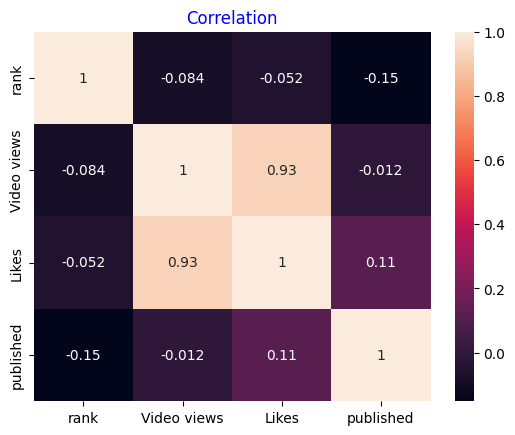

In [114]:
sns.heatmap(corr, annot=True)
plt.title('Correlation', color='blue')
plt.show()

##### Exploratory

##### Average Views for Each Video Category

In [115]:
video_category = youtube_data.groupby('Category')['Video views'].mean()
video_category

Category
Autos & Vehicles         1.248034e+07
Comedy                   6.603804e+06
Education                1.158603e+07
Entertainment            1.484476e+07
Film & Animation         1.308167e+07
Gaming                   9.130539e+06
Howto & Style            4.516929e+07
Music                    3.717160e+07
News & Politics          3.696094e+06
Nonprofits & Activism    1.150651e+06
People & Blogs           1.873132e+07
Pets & Animals           1.004739e+07
Science & Technology     2.002304e+07
Sports                   1.577134e+07
Travel & Events          2.206684e+07
Name: Video views, dtype: float64

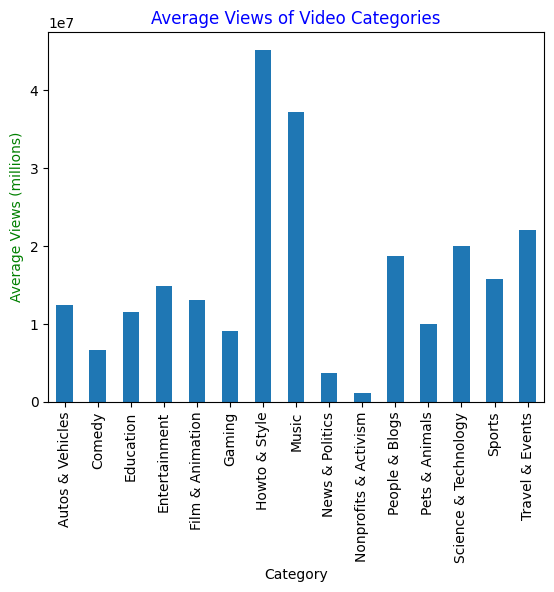

In [116]:
video_category.plot(kind='bar')
plt.ylabel('Average Views (millions)', color='green')
plt.title('Average Views of Video Categories', color='blue')
plt.show()

In [117]:
published_year = youtube_data.groupby('published')['Category'].value_counts()
published_year

published  Category            
2005       Comedy                   1
2006       Music                   11
           Entertainment            6
           Comedy                   4
           Autos & Vehicles         2
                                   ..
2025       Film & Animation         2
           Autos & Vehicles         1
           Howto & Style            1
           Pets & Animals           1
           Science & Technology     1
Name: count, Length: 136, dtype: int64

In [118]:
category_count = youtube_data['Category'].value_counts()
category_count

Category
Music                    431
People & Blogs           257
Entertainment             81
Comedy                    53
Sports                    35
Film & Animation          29
Gaming                    22
Autos & Vehicles          19
Pets & Animals            18
News & Politics           14
Education                  5
Nonprofits & Activism      5
Science & Technology       5
Travel & Events            4
Howto & Style              4
Name: count, dtype: int64

##### Likes of each Video Category

In [119]:
category_likes = youtube_data.groupby('Category')['Likes'].sum()
category_likes

Category
Autos & Vehicles           6482119
Comedy                     2711499
Education                   914747
Entertainment             38038916
Film & Animation          17658369
Gaming                     9503368
Howto & Style              2802331
Music                    126163103
News & Politics             134638
Nonprofits & Activism        37844
People & Blogs           141114842
Pets & Animals             2693752
Science & Technology       2363819
Sports                    13917184
Travel & Events            2999533
Name: Likes, dtype: int64

Text(0, 0.5, 'Likes (millions)')

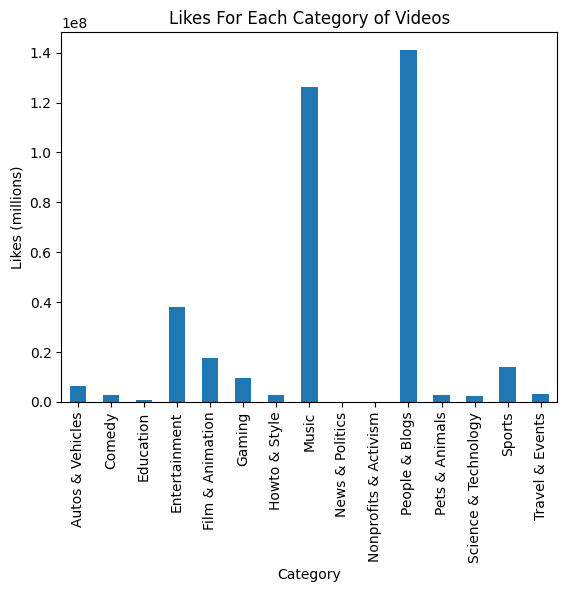

In [120]:
category_likes.plot(kind='bar')
plt.title('Likes For Each Category of Videos')
plt.ylabel('Likes (millions)')